In [113]:
using JLD2
using Statistics
using Printf
using Laplacians
using Plots

In [2]:
sortrows(A, i, rev=false) = sortslices(A, dims=1, lt=(x,y)->isless(x[i],y[i]), rev=rev)

sortrows (generic function with 2 methods)

# scaling of AC on unit wt chimera

In [3]:
# unweighted chimera
@load "uni_chimera_all.jl.split02merge02.n10000.h1.0.jld2"
dic_uniChimera = copy(dic);
@load "uni_chimera_all.jl.split02merge02.n100000.h2.0.jld2"
dic_uniChimera = merge(vcat,dic_uniChimera, dic);
@load "uni_chimera_all.jl.split02merge02.n1000000.h4.0.jld2"
dic_uniChimera = merge(vcat,dic_uniChimera, dic);
@load "uni_chimera_all.jl.split02merge02.n10000000.h8.0.jld2"
dic_uniChimera = merge(vcat,dic_uniChimera, dic);

In [48]:
nnz_w_time = [ dic_uniChimera["ne"] dic_uniChimera["ac_tot"] ];
sort_nnz_w_time = sortrows(nnz_w_time,1)

239×2 Matrix{Float64}:
 29998.0          0.00258589
 29998.0          0.00256562
 29998.0          0.00267982
 30336.0          0.00658798
 30828.0          0.00687885
 30978.0          0.00732589
 33150.0          0.0109189
 33216.0          0.0108397
 33222.0          0.01053
 33252.0          0.010771
 33300.0          0.0114799
 35334.0          0.0134501
 39992.0          0.018275
     ⋮          
     9.0e6       14.6511
     1.25932e7   26.3746
     1.42552e7   25.3653
     1.77297e7   26.9494
     4.00087e7  137.042
     5.01634e7  129.36
     6.55036e7  160.754
     6.61169e7  197.867
     9.83662e7  202.406
     1.01597e8  344.842
     1.12547e8  444.75
     1.22062e8  312.313

In [58]:
@show nnzmin = sort_nnz_w_time[1,1];
@show nnzmax = sort_nnz_w_time[end,1];

nnzmin = sort_nnz_w_time[1, 1] = 29998.0
nnzmax = sort_nnz_w_time[end, 1] = 1.22062482e8


Here's just a plot of t/nnz as a function of nnz (log scale on x-axis)

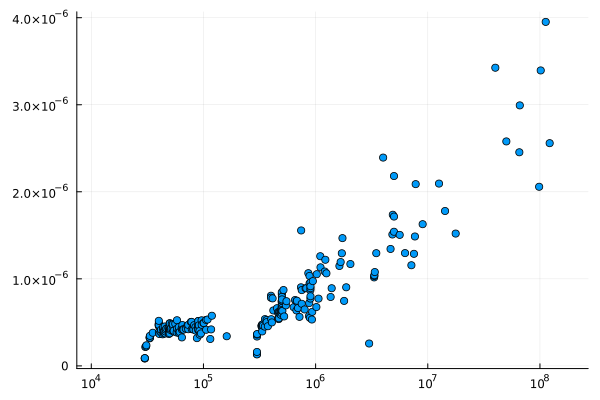

In [49]:
pdata = [ sort_nnz_w_time[:,1] sort_nnz_w_time[:,2]./sort_nnz_w_time[:,1] ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8])

If O(mlog^3m) is an upper bound, then after dividing by that, we shouldn't see growth. The following plots show this.

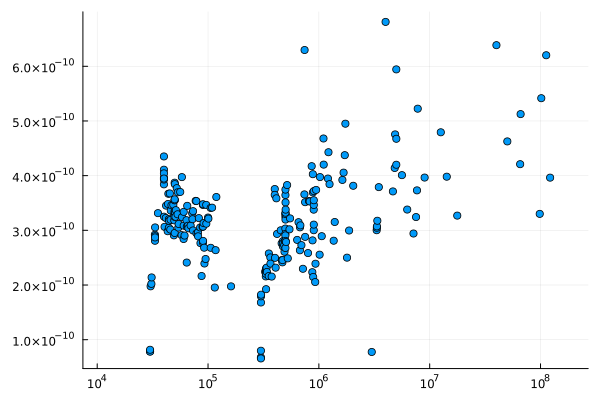

In [51]:
pdata = [ sort_nnz_w_time[:,1] sort_nnz_w_time[:,2]./((x -> x*log(x)^3).(sort_nnz_w_time[:,1])) ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8])

The simplest plot would just be nnz vs time -- but this doesn't seem that useful w/o a slope estimate

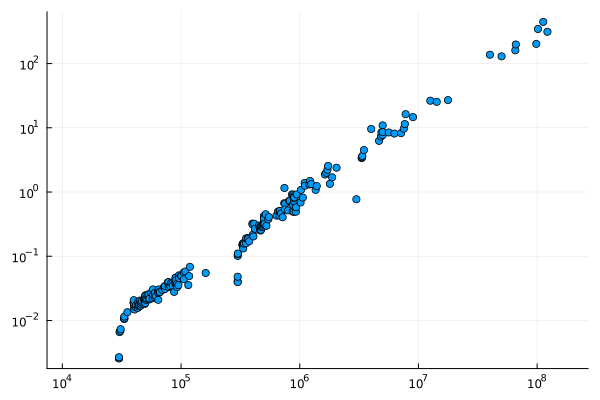

In [100]:
pdata = sort_nnz_w_time
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

Maybe we can get a better sense of the data by adding a line for m log^3 m?

Here's m vs time and m vs 8e-9 mlog^3m

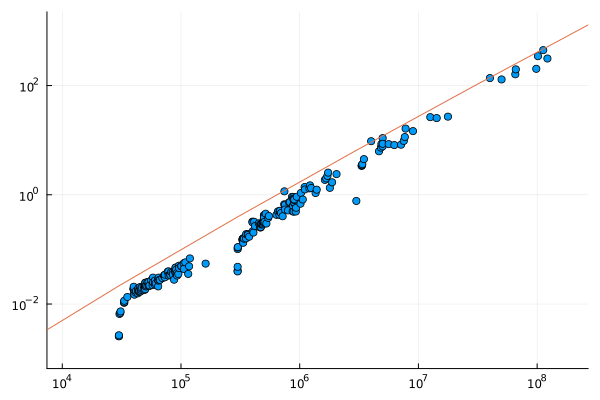

In [111]:
pdata = sort_nnz_w_time
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

logmin = log10(nnzmin)-1
logmax = log10(nnzmax)+1
pmodelx = [10^i for i = logmin:logmax];
pmodely = [ 8e-9 * 10^i * i^3 for i = logmin:logmax];

plot!(pmodelx,pmodely,label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)



Next let's see m vs time/n and m vs 8e-9 log^3m

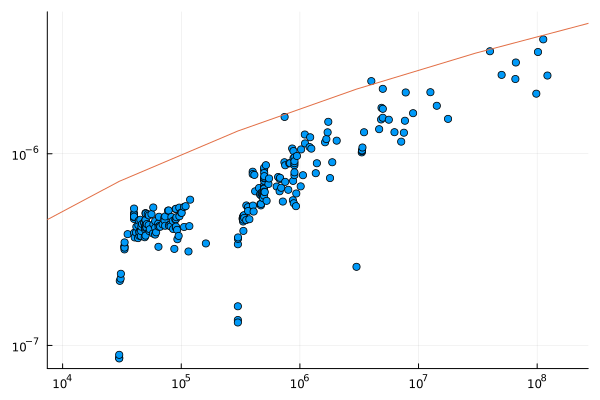

In [109]:
pdata = [ sort_nnz_w_time[:,1] sort_nnz_w_time[:,2]./sort_nnz_w_time[:,1] ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

logmin = log10(nnzmin)-1
logmax = log10(nnzmax)+1
pmodelx = [10^i for i = logmin:logmax];
pmodely = [ 8e-9 * i^3 for i = logmin:logmax];

plot!(pmodelx,pmodely,label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)


# scaling of AC2 on unit wt chimera


In [ ]:
pdata = [ sort_nnz_w_time[:,1] sort_nnz_w_time[:,2]./sort_nnz_w_time[:,1] ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

logmin = log10(nnzmin)-1
logmax = log10(nnzmax)+1
pmodelx = [10^i for i = logmin:logmax];
pmodely = [ 8e-9 * i^3 for i = logmin:logmax];

plot!(pmodelx,pmodely,label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

In [115]:
nnz_w_time = [ dic_uniChimera["ne"] dic_uniChimera["ac2_tot"] ];
sort_nnz_w_time = sortrows(nnz_w_time,1)

239×2 Matrix{Float64}:
 29998.0           0.00374699
 29998.0           0.00379801
 29998.0           0.0039711
 30336.0           0.00867295
 30828.0           0.00901198
 30978.0           0.0100162
 33150.0           0.016144
 33216.0           0.0164962
 33222.0           0.0164521
 33252.0           0.0164089
 33300.0           0.0166278
 35334.0           0.0249898
 39992.0           0.0443261
     ⋮          
     9.0e6        58.4699
     1.25932e7   174.436
     1.42552e7   204.408
     1.77297e7   269.989
     4.00087e7   348.062
     5.01634e7   486.428
     6.55036e7   721.611
     6.61169e7   938.317
     9.83662e7   869.369
     1.01597e8  2366.71
     1.12547e8  2868.64
     1.22062e8  1312.19

Here's a plot of t/nnz as a function of nnz (log scale on x-axis)

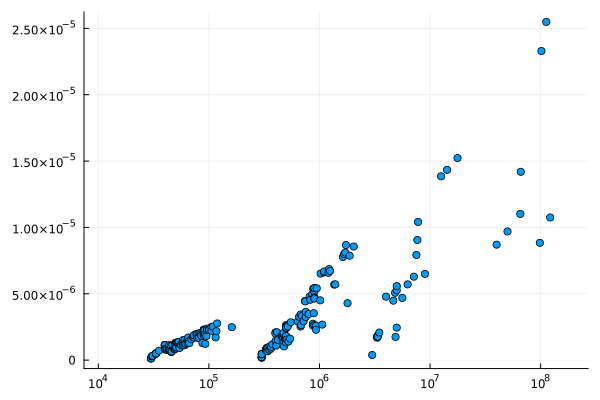

In [116]:
pdata = [ sort_nnz_w_time[:,1] sort_nnz_w_time[:,2]./sort_nnz_w_time[:,1] ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8])

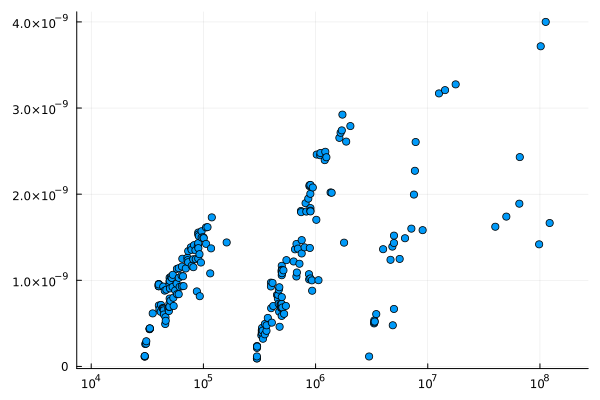

In [117]:
pdata = [ sort_nnz_w_time[:,1] sort_nnz_w_time[:,2]./((x -> x*log(x)^3).(sort_nnz_w_time[:,1])) ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8])

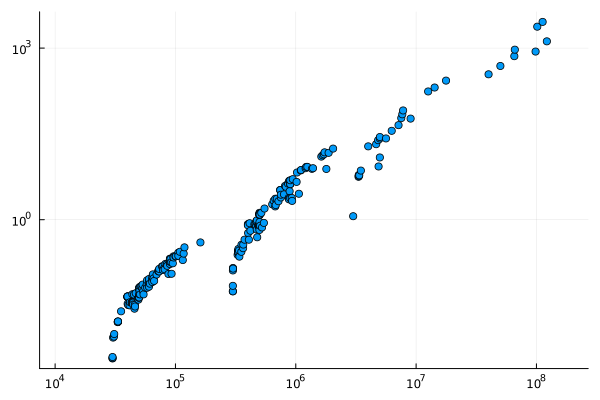

In [118]:
pdata = sort_nnz_w_time
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

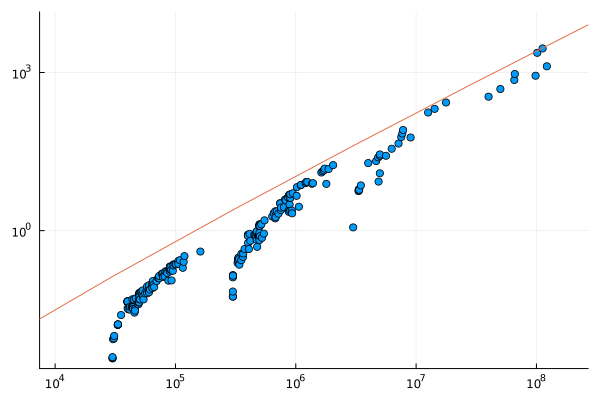

In [123]:
pdata = sort_nnz_w_time
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

logmin = log10(nnzmin)-1
logmax = log10(nnzmax)+1
pmodelx = [10^i for i = logmin:logmax];
pmodely = [ 5e-8 * 10^i * i^3 for i = logmin:logmax];

plot!(pmodelx,pmodely,label="",xaxis =:log,xlims=[1e4,2e8],yaxis=:log)

# ac2 scaling on all 